In [3]:
import pandas as pd

customer_df = pd.read_csv('archive/data.csv')
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preprocessing & Overview

The upcoming cells provide an overview of the data, make some initial data cleaning, formatting and arrangement for further analysis.

In [9]:
# Displaying the number of Rows and Columns

print("The Number of Rows in the Dataset", customer_df.shape[0])
print("The Number of Columns in the Dataset", customer_df.shape[1])

The Number of Rows in the Dataset 541909
The Number of Columns in the Dataset 8


In [10]:
# Dataset Summary

customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
# Checking for Null Values

customer_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
# Null value handling

# From the Description above we can see that Description and CustomerID contain null values

customer_df['Description'] = customer_df['Description'].fillna('Description N/A')
customer_df['CustomerID'] = customer_df['CustomerID'].fillna(0.0)

In [25]:
# Datatype Handling
from datetime import datetime as dt

customer_df['CustomerID'] = customer_df['CustomerID'].astype(int)
customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'])

customer_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [23]:
# Dataset Description

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


In [8]:
# Invoice Date Limits

print("The Invoice Data lies between ", customer_df.InvoiceDate.min(),\
      " and ", customer_df.InvoiceDate.max())

The Invoice Data lies between  2010-12-01 08:26:00  and  2011-12-09 12:50:00


## RFM Calculation

### Recency Calculation:

How recently a customer made a purchase. Calculate the number of days since the customer's last purchase.

In [9]:
# Calculating the most recent date in the dataset
most_recent_date = customer_df['InvoiceDate'].max()

# Calculating the difference between the order date and the most recent date
customer_df['DaysSinceLastPurchase'] = \
(most_recent_date - customer_df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

recency_df = customer_df.groupby('CustomerID')['DaysSinceLastPurchase'].min().reset_index()

recency_df.head()


,CustomerID,DaysSinceLastPurchase
0,0,0
1,12346,325
2,12347,1
3,12348,74
4,12349,18


### Frequency

How often a customer makes a purchase. Calculate the total number of orders for each customer

In [10]:
# Grouping by CustomerID and using count to get the Frequency of orders made by each Customer

frequency_df = customer_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

frequency_df.head()

,CustomerID,Frequency
0,0,3710
1,12346,2
2,12347,7
3,12348,4
4,12349,1


### Monetary
The total monetary value of a customer's purchases. Calculate the sum of the total price for each customer

In [11]:
# Calculating the Monetary value by getting the product of each UnitPrice and Quantity mentioned in an order

customer_df['TotalPrice'] = customer_df['Quantity'] * customer_df['UnitPrice']
monetary_df = customer_df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df.head()

,CustomerID,Monetary
0,0,1447682.12
1,12346,0.00
2,12347,4310.00
3,12348,1797.24
4,12349,1757.55


## RFM Segmentation

Calculating R_Score, F_Score and M_Score for every Customer. These scores are then combined to get the RFM Score for each customer. 


In [12]:
# Assigning R, F and M scores for each customer from their respective Data Frames

recency_df.sort_values(by= ['DaysSinceLastPurchase'], ascending = True, inplace = True)
recency_df['R_Score'] = pd.qcut(recency_df['DaysSinceLastPurchase'], q=[0, 0.25, 0.5, 0.75, 1], labels=False,\
                                duplicates = 'drop') + 1
recency_df['R_Score'].fillna(0.0, inplace = True)

recency_df

,CustomerID,DaysSinceLastPurchase,R_Score
0,0,0,1
4126,17949,0,1
1128,13860,0,1
3114,16558,0,1
3163,16626,0,1
...,...,...,...
360,12791,373,4
4213,18074,373,4
1047,13747,373,4
1765,14729,373,4


In [13]:
frequency_df.sort_values(by= ['Frequency'], ascending = False, inplace = True)
frequency_df['F_Score'] = pd.qcut(frequency_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop') + 1

frequency_df

,CustomerID,Frequency,F_Score
0,0,3710,3
1896,14911,248,3
331,12748,224,3
4043,17841,169,3
1675,14606,128,3
...,...,...,...
3002,16404,1,1
1142,13877,1,1
2998,16400,1,1
1143,13878,1,1


In [14]:
monetary_df.sort_values(by= ['Monetary'], ascending = False, inplace = True)
monetary_df['M_Score'] = pd.qcut(monetary_df['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=False, duplicates='drop') + 1

monetary_df

,CustomerID,Monetary,M_Score
0,0,1447682.12,4
1704,14646,279489.02,4
4234,18102,256438.49,4
3759,17450,187482.17,4
1896,14911,132572.62,4
...,...,...,...
126,12503,-1126.00,1
3871,17603,-1165.30,1
1385,14213,-1192.20,1
2237,15369,-1592.49,1


In [15]:
# Combining the R, F and M scores to create a single score
# The formula used to combine these scores : R * 100 + F * 10 + M

rfm_scores = pd.merge(recency_df[['CustomerID', 'R_Score']], frequency_df[['CustomerID', 'F_Score']], on='CustomerID')
rfm_scores = pd.merge(rfm_scores, monetary_df[['CustomerID', 'M_Score']], on='CustomerID')

rfm_scores['RFM_Score'] = rfm_scores['R_Score'] * 100 + rfm_scores['F_Score'] * 10 + rfm_scores['M_Score']
rfm_scores

,CustomerID,R_Score,F_Score,M_Score,RFM_Score
0,0,1,3,4,134
1,17949,1,3,4,134
2,13860,1,3,3,133
3,16558,1,3,4,134
4,16626,1,3,4,134
...,...,...,...,...,...
4368,12791,4,1,1,411
4369,18074,4,1,2,412
4370,13747,4,1,1,411
4371,14729,4,1,2,412


### Customer Segmentation

Using K-Means clustering to segment customers based on their RFM scores.


In [16]:
from sklearn.preprocessing import StandardScaler

# Extract RFM scores for clustering
rfm_data = rfm_scores[['R_Score', 'F_Score', 'M_Score']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)
rfm_scaled

array([[-1.32069435,  1.58566721,  1.34182492],
       [-1.32069435,  1.58566721,  1.34182492],
       [-1.32069435,  1.58566721,  0.44747949],
       ...,
       [ 1.34651458, -0.76289256, -1.34121137],
       [ 1.34651458, -0.76289256, -0.44686594],
       [ 1.34651458, -0.76289256, -1.34121137]])

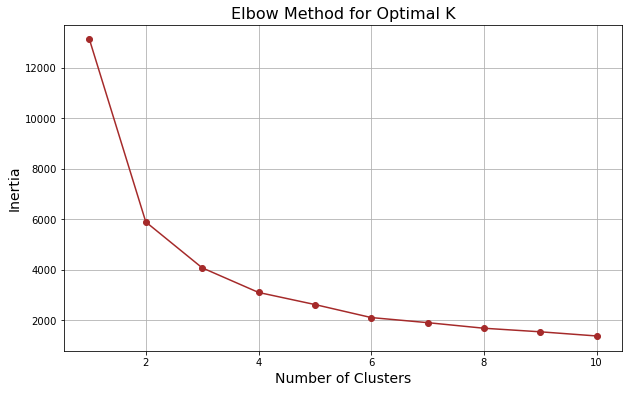

In [17]:
# Finding the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Trying different numbers of clusters
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow graph to observe which is the optimal number of clusters

plt.figure(figsize = (10,6))
plt.plot(k_values, inertias, marker='o', color = 'brown')
plt.xlabel('Number of Clusters', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.title('Elbow Method for Optimal K', fontsize = 16)
plt.grid(True)
plt.show()


### Cluster Size Comparison

From the Elbow Graph, we notice that a Cluster size of 3 or 4 might be optimal. 
The Silhouette Score is used to see which cluster size is optimal. A higher Silhouette Score suggests that the cluster size is optimal.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Cluster Size 3
kmeans_1 = KMeans(n_clusters=3, random_state=0)
labels_1 = kmeans_1.fit_predict(rfm_scaled)
silhouette_1 = silhouette_score(rfm_scaled, labels_1)

# For Cluster Size 4
kmeans_2 = KMeans(n_clusters=4, random_state=0)
labels_2 = kmeans_2.fit_predict(rfm_scaled)
silhouette_2 = silhouette_score(rfm_scaled, labels_2)

if(silhouette_1 > silhouette_2):
    print("Cluster Size 3 is optimal since ", round(silhouette_1, 2), " is greater than ", round(silhouette_2, 2))
else:
    print("Cluster Size 4 is optimal since ", round(silhouette_2, 2), " is greater than ", round(silhouette_1, 2))


Cluster Size 4 is optimal since  0.47  is greater than  0.45


In [19]:
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scores['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_scores

,CustomerID,R_Score,F_Score,M_Score,RFM_Score,Cluster
0,0,1,3,4,134,0
1,17949,1,3,4,134,0
2,13860,1,3,3,133,0
3,16558,1,3,4,134,0
4,16626,1,3,4,134,0
...,...,...,...,...,...,...
4368,12791,4,1,1,411,1
4369,18074,4,1,2,412,1
4370,13747,4,1,1,411,1
4371,14729,4,1,2,412,1


In [20]:
rfm_scores['Cluster'].value_counts()

1    1422
0    1269
2     896
3     786
Name: Cluster, dtype: int64

#### Recency Score Across Clusters

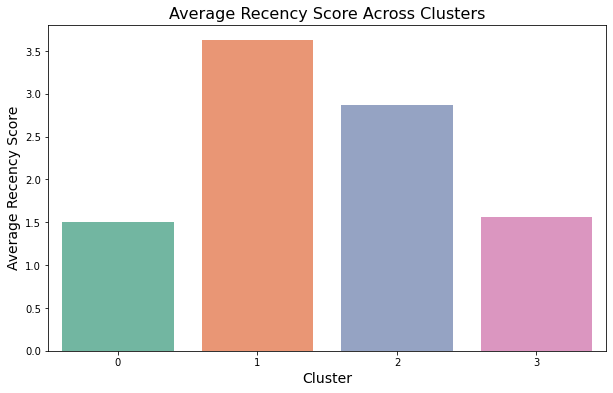

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant columns for visualization
recency_data = rfm_scores[['Cluster', 'R_Score']]

#Create a bar plot of average recency scores across clusters

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='R_Score', data=recency_data, ci=None, palette="Set2")
plt.title('Average Recency Score Across Clusters', fontsize = 16)
plt.xlabel('Cluster', fontsize = 14)
plt.ylabel('Average Recency Score', fontsize = 14)
plt.show()

#### Frequency Score Across Clusters

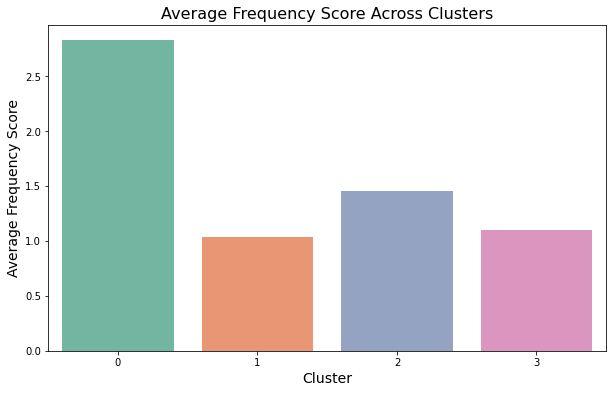

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant columns for visualization
frequency_data = rfm_scores[['Cluster', 'F_Score']]

# Create a bar plot of average recency scores across clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='F_Score', data=frequency_data, ci=None, palette="Set2")
plt.title('Average Frequency Score Across Clusters', fontsize = 16)
plt.xlabel('Cluster', fontsize = 14)
plt.ylabel('Average Frequency Score', fontsize = 14)
plt.show()


#### Monetary Score Across Clusters

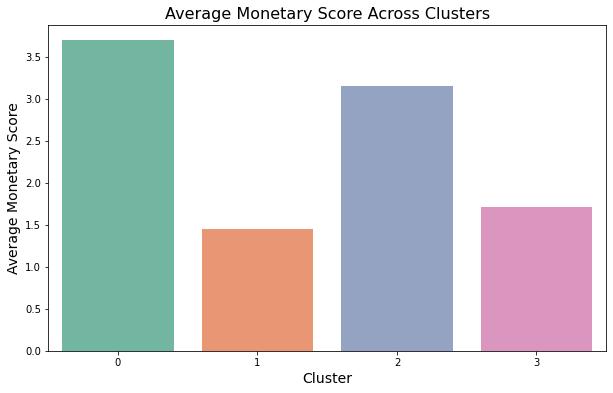

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant columns for visualization
monetary_data = rfm_scores[['Cluster', 'M_Score']]

# Create a bar plot of average recency scores across clusters
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='M_Score', data=monetary_data, ci=None, palette="Set2")
plt.title('Average Monetary Score Across Clusters', fontsize = 16)
plt.xlabel('Cluster', fontsize = 14)
plt.ylabel('Average Monetary Score', fontsize = 14)
plt.show()

## Visualization

Visualizations (e.g., bar charts, scatter plots, or heat maps) to illustrate the RFM distribution and the clusters formed.

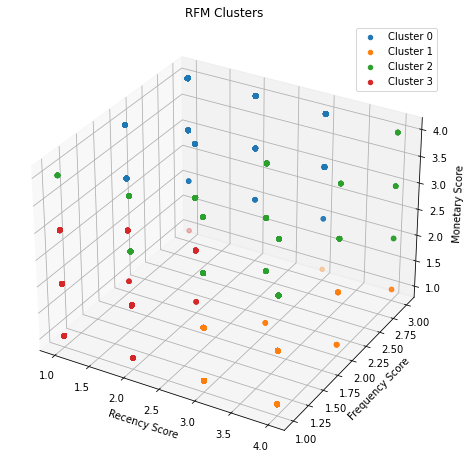

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract relevant columns for visualization
cluster_data = rfm_scores[['R_Score', 'F_Score', 'M_Score', 'Cluster']]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points for each cluster
for cluster in range(optimal_k):
    cluster_points = cluster_data[cluster_data['Cluster'] == cluster]
    ax.scatter(cluster_points['R_Score'], cluster_points['F_Score'], cluster_points['M_Score'], label=f'Cluster {cluster}')

# Set axis labels
ax.set_xlabel('Recency Score')
ax.set_ylabel('Frequency Score')
ax.set_zlabel('Monetary Score')
ax.set_title('RFM Clusters')

# Add a legend
ax.legend()

plt.show()

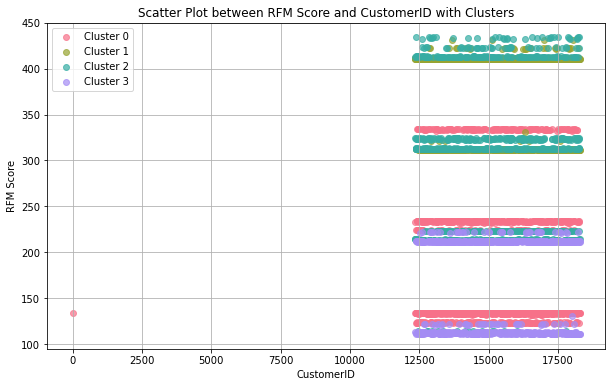

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better color palettes

# Extract relevant columns for visualization
scatter_data = rfm_scores[['CustomerID', 'RFM_Score', 'Cluster']]

# Set up a color palette for the clusters
cluster_palette = sns.color_palette("husl", n_colors=optimal_k)


# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = scatter_data[scatter_data['Cluster'] == cluster]
    plt.scatter(cluster_points['CustomerID'], cluster_points['RFM_Score'], label=f'Cluster {cluster}', alpha=0.7, color=cluster_palette[cluster])

# Set plot labels and title
plt.title('Scatter Plot between RFM Score and CustomerID with Clusters')
plt.xlabel('CustomerID')
plt.ylabel('RFM Score')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [26]:
# Displaying Cluster Profiles for observations based on R, F and M scores

cluster_profiles = rfm_scores.groupby('Cluster').agg({
    'R_Score': ['mean', 'median', 'std'],
    'F_Score': ['mean', 'median', 'std'],
    'M_Score': ['mean', 'median', 'std'],
    # Add other relevant attributes
}).round(2)

print(cluster_profiles)

        R_Score              F_Score              M_Score             
           mean median   std    mean median   std    mean median   std
Cluster                                                               
0          1.51      1  0.69    2.83      3  0.38    3.70      4  0.49
1          3.63      4  0.48    1.03      1  0.19    1.45      1  0.50
2          2.87      3  0.77    1.45      1  0.57    3.16      3  0.48
3          1.56      2  0.50    1.10      1  0.30    1.72      2  0.65


## Segment Profiling

### Cluster 0:Active and High-Value Customers

R_Score: Customers in this segment have a relatively low recency score, with a mean of 1.51. This suggests that they made recent purchases.

F_Score: They have a relatively high frequency score, with a mean of 2.83, indicating that they make frequent purchases.

M_Score: The monetary value of their purchases is high, with a mean of 3.70.

<u>Characteristics:</u> This segment likely represents active and high-value customers who have made recent and frequent purchases.

### Cluster 1:Dormant or Lapsed Customers

R_Score: Customers in this segment have a high recency score, with a mean of 3.63, suggesting less recent purchases.

F_Score: They have a relatively low frequency score, with a mean of 1.03, indicating infrequent purchases.

M_Score: The monetary value of their purchases is lower, with a mean of 1.45.

<u>Characteristics:</u> This segment may include customers who haven't made purchases recently and have lower frequency and monetary values. It could represent dormant or lapsed customers.

### Cluster 2:Occasional High Spenders

R_Score: Customers in this segment have a moderate recency score, with a mean of 2.87.

F_Score: They have a moderate frequency score, with a mean of 1.45.

M_Score: The monetary value of their purchases is relatively high, with a mean of 3.16.

<u>Characteristics:</u> This segment represents customers with moderate recency and frequency, but higher monetary values. They may be occasional buyers who spend more per purchase.

### Cluster 3:Moderately Frequent and Recent Purchasers

R_Score: Customers in this segment have a low recency score, with a mean of 1.56.

F_Score: They have a moderate frequency score, with a mean of 1.10.

M_Score: The monetary value of their purchases is moderate, with a mean of 1.72.

<u>Characteristics:</u> This segment includes customers who make moderately frequent and recent purchases with a moderate monetary value.

## Market Recommendations

### Cluster 0: Active and High-Value Customers

#### Recommendations:
Retention Focus: Implement loyalty programs or exclusive offers to reward and retain these active customers.
Personalized Campaigns: Launch personalized marketing campaigns based on their recent purchases to encourage repeat business.
Cross-Selling: Suggest complementary products or services to maximize their spending.

### Cluster 1: Dormant or Lapsed Customers

#### Recommendations:
Reactivation Campaigns: Design targeted campaigns to win back these customers, offering special promotions or incentives.
Survey Feedback: Send surveys to understand reasons for inactivity and tailor offers based on their feedback.
Reminders: Use personalized reminders to bring their attention back to the brand and highlight new offerings.

### Cluster 2: Occasional High Spenders

#### Recommendations:
Promotions for High-Value Items: Identify and promote high-margin or high-value items to encourage larger transactions.
Exclusive Events: Create exclusive events or early access for this segment to make them feel valued.
Subscription Services: Introduce subscription-based services for products they frequently purchase.

### Cluster 3: Moderately Frequent and Recent Purchasers

#### Recommendations:
Frequency Incentives: Encourage more frequent purchases through tiered discounts or loyalty points.
New Product Introductions: Showcase new products to stimulate interest and drive additional purchases.
Targeted Promotions: Use targeted promotions based on their past behavior to increase engagement.

## Deep-Dive into Customer Data

Listed below are some of the additional analyses performed on the Customer Data that depict valuable insights into patterns or trends across the dataset. 

### Customer Analysis

In [27]:
# Question 1: How many unique customers are there in the dataset?

unique_customers = customer_df['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 4373


In [28]:
# Question 2: Distribution of the number of orders per customer
orders_per_customer = customer_df.groupby('CustomerID')['InvoiceNo'].nunique()
print("\nDistribution of the number of orders per customer:")
print(orders_per_customer.describe())


Distribution of the number of orders per customer:
count    4373.000000
mean        5.922708
std        56.798813
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      3710.000000
Name: InvoiceNo, dtype: float64


#### Comments on the Distribution of orders across each customer

1. <u>Number of Customers (Count)</u>: There are 4373 unique customers in the dataset.
2. <u>Average Number of Orders per Customer (Mean)</u>: On average, each customer has approximately 5.92 orders
3. <u>Variability in the Number of Orders (Standard Deviation)</u>: The standard deviation is relatively high at 56.80, indicating a significant amount of variability or dispersion in the number of orders per customer. The dataset has a wide range of values.
4. <u>Minimum Number of Orders (Min)</u>: The minimum number of orders placed by a single customer is 1.
5. <u>25th Percentile (Q1)</u>: 25% of customers have 1 order or fewer. This indicates that a substantial portion of customers made a very small number of orders.
6. <u>50th Percentile (Median or Q2)</u>: The median is 3, suggesting that 50% of customers have 3 orders or fewer. This provides insight into the central tendency of the middle part of the distribution.
7. <u>75th Percentile (Q3)</u>: 75% of customers have 5 orders or fewer. This indicates that a large majority of customers have a relatively low number of orders.
8. <u>Maximum Number of Orders (Max)</u>: The maximum number of orders placed by a single customer is exceptionally high at 3710, highlighting the presence of outliers or a small number of customers with a significantly higher order frequency.

In summary, the distribution suggests a dataset with a wide range of order frequencies per customer. While the average is around 5.92 orders, the presence of outliers significantly impacts the standard deviation and maximum values. Understanding the distribution of orders per customer is crucial for segmenting and tailoring strategies to different customer groups. Additionally, further investigation into the factors contributing to outliers may be valuable for a more nuanced analysis.

In [29]:
# Question 3: Identify the top 5 customers with the most purchases by order count (excluding CustomerID 0)
top_customers = customer_df[customer_df['CustomerID'] != 0].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(5)

print("\nTop 5 customers with the most purchases by order count (excluding CustomerID 0):")
print(top_customers)


Top 5 customers with the most purchases by order count (excluding CustomerID 0):
CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
Name: InvoiceNo, dtype: int64


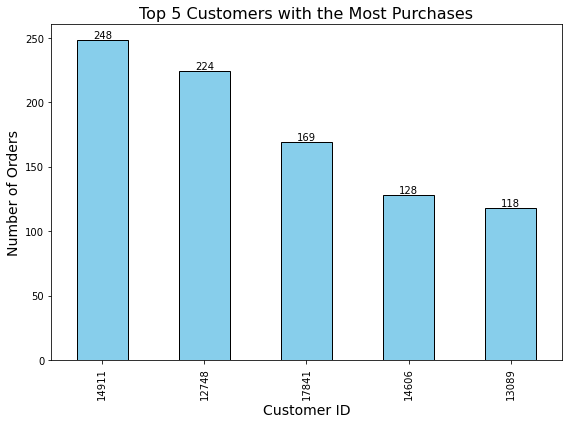

In [30]:
# Plotting the top 5 customers
plt.figure(figsize=(8, 6))  
top_customers.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 5 Customers with the Most Purchases', fontsize=16)
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Adding data labels on top of each bar for better visibility
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout() 
plt.show()

### Product Analysis

In [31]:
# Question 1: What are the top 10 most frequently purchased products?

top_products = customer_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 most frequently purchased products:")
print(top_products)

Top 10 most frequently purchased products:
StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64


In [32]:
# Question 2: Average price of products in the dataset

average_price = customer_df['UnitPrice'].mean()
print("\nAverage price of products in the dataset:", average_price)


Average price of products in the dataset: 4.611113626083471


In [33]:
# Question 3: Product category generating the highest revenue

customer_df['TotalPrice'] = customer_df['Quantity'] * customer_df['UnitPrice']
highest_revenue_category = customer_df.groupby('StockCode')['TotalPrice'].sum().idxmax()
print("\nProduct category generating the highest revenue:", highest_revenue_category)


Product category generating the highest revenue: DOT


In [34]:
# Printing the highest revenue values

total_price_df = customer_df
total_price_df = customer_df.groupby('StockCode')['TotalPrice'].sum()
total_price_df.sort_values(ascending = [False], inplace=True)
total_price_df

StockCode
DOT             206245.480
22423           164762.190
47566            98302.980
85123A           97894.500
85099B           92356.030
                   ...    
BANK CHARGES     -7175.639
CRUK             -7933.430
B               -11062.060
M               -68674.190
AMAZONFEE      -221520.500
Name: TotalPrice, Length: 4070, dtype: float64

### Time Analysis

In [35]:
# Extract day of the week and hour of the day from InvoiceDate
customer_df['DayOfWeek'] = customer_df['InvoiceDate'].dt.day_name()
customer_df['HourOfDay'] = customer_df['InvoiceDate'].dt.hour
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   InvoiceNo              541909 non-null  object        
 1   StockCode              541909 non-null  object        
 2   Description            541909 non-null  object        
 3   Quantity               541909 non-null  int64         
 4   InvoiceDate            541909 non-null  datetime64[ns]
 5   UnitPrice              541909 non-null  float64       
 6   CustomerID             541909 non-null  int32         
 7   Country                541909 non-null  object        
 8   DaysSinceLastPurchase  541909 non-null  int64         
 9   TotalPrice             541909 non-null  float64       
 10  DayOfWeek              541909 non-null  object        
 11  HourOfDay              541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), 

In [36]:
# Question 1: Most orders by day of the week

most_orders_by_day = customer_df['DayOfWeek'].value_counts().sort_values(ascending=False)
print("Most orders by day of the week:")
print(most_orders_by_day)

Most orders by day of the week:
Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: DayOfWeek, dtype: int64


In [37]:
# Question 2: Most orders by hour of the day

most_orders_by_hour = customer_df['HourOfDay'].value_counts().sort_values(ascending=False)
print("\nMost orders by hour of the day:")
print(most_orders_by_hour)


Most orders by hour of the day:
12    78709
15    77519
13    72259
14    67471
11    57674
16    54516
10    49037
9     34332
17    28509
8      8909
18     7974
19     3705
20      871
7       383
6        41
Name: HourOfDay, dtype: int64


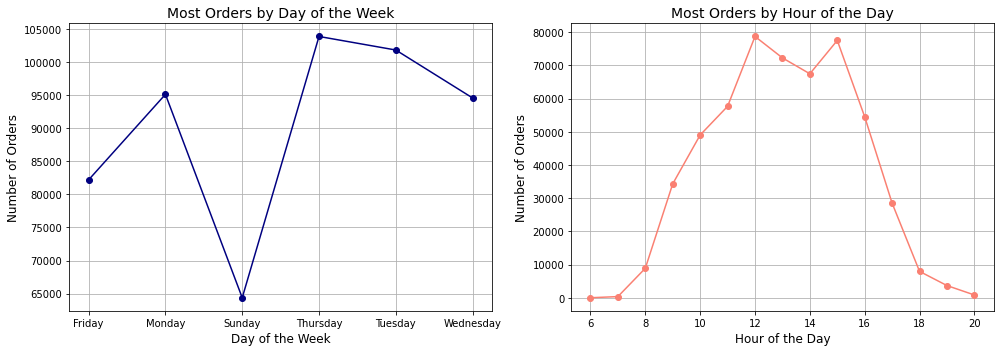

In [38]:
# Plotting Most orders by day of the week using a line plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
most_orders_by_day.sort_index().plot(kind='line', marker='o', color='navy')
plt.title('Most Orders by Day of the Week', fontsize = 14)
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.grid(True)

# Plotting Most orders by hour of the day using a line plot
plt.subplot(1, 2, 2)
most_orders_by_hour.sort_index().plot(kind='line', marker='o', color='salmon')
plt.title('Most Orders by Hour of the Day', fontsize = 14)
plt.xlabel('Hour of the Day', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Question 3: Average order processing time

customer_df['OrderProcessingTime'] = (customer_df['InvoiceDate'].max() - customer_df['InvoiceDate']).dt.total_seconds() / (60 * 60 * 24)  # Convert to days
average_order_processing_time = customer_df['OrderProcessingTime'].mean()
print(f"\nAverage order processing time: {average_order_processing_time:.2f} days")


Average order processing time: 157.97 days


In [40]:
# Question 4: Seasonal trends

monthly_order_totals = customer_df.resample('M', on='InvoiceDate')['InvoiceNo'].count()
print("\nMonthly order totals:")
print(monthly_order_totals)


Monthly order totals:
InvoiceDate
2010-12-31    42481
2011-01-31    35147
2011-02-28    27707
2011-03-31    36748
2011-04-30    29916
2011-05-31    37030
2011-06-30    36874
2011-07-31    39518
2011-08-31    35284
2011-09-30    50226
2011-10-31    60742
2011-11-30    84711
2011-12-31    25525
Freq: M, Name: InvoiceNo, dtype: int64


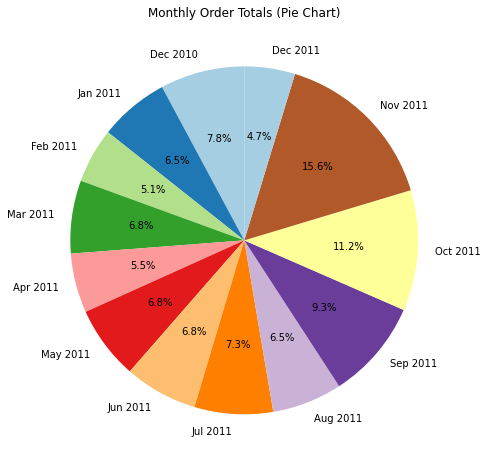

In [41]:
# Plotting the Seasonal Trends

# Format the datetime index to display month and year
formatted_labels = monthly_order_totals.index.strftime('%b %Y')

# Plotting the pie chart with improved display
plt.figure(figsize=(8, 8))
plt.pie(monthly_order_totals, labels=formatted_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=dict(width=1))
plt.title('Monthly Order Totals (Pie Chart)')
plt.show()

### Geographical Analysis

In [49]:
# Determining the top 5 countries with the highest number of orders. 

top_5_countries = customer_df['Country'].value_counts().nlargest(5)
print("Top 5 countries with the highest number of orders:")
print(top_5_countries)

Top 5 countries with the highest number of orders:
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64


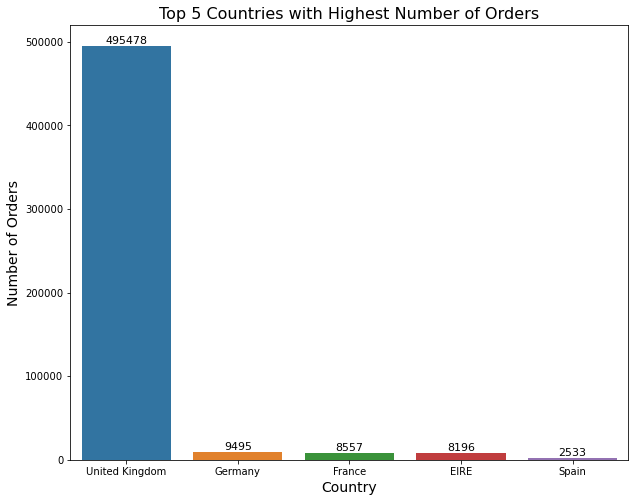

In [70]:
# Creating a bar plot of the top 5 countries
plt.figure(figsize=(10,8))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)

# Adding the count on bars according to their country
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, (bar.get_height() + 6000) , top_5_countries.iloc[i], 
             ha='center', va='center', fontsize = 11)

# labelling title
plt.title('Top 5 Countries with Highest Number of Orders', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Number of Orders', fontsize = 14)
plt.show()


This code snippet uses the value_counts() function to count the occurrences of each country in the 'Country' column and then uses nlargest(5) to get the top 5 countries.
The output shows the top 5 countries with the highest number of orders. The United Kingdom is at the top with 495,478 orders, followed by Germany with 9,495 orders, France with 8,557 orders, EIRE with 8,196 orders, and Spain with 2,533 orders.

In [71]:
# Assessing if there is a correlation between the country of the customer and the average order value.

average_order_value_by_country = customer_df.groupby('Country')['Quantity'].sum()\
* customer_df.groupby('Country')['UnitPrice'].mean()
average_order_value_by_country = average_order_value_by_country / customer_df.groupby('Country')['Quantity'].sum()

correlation = customer_df.groupby('Country')['Quantity'].sum().corr(average_order_value_by_country)
print("Correlation between the country and average order value:", correlation)

Correlation between the country and average order value: -0.038618756054183856


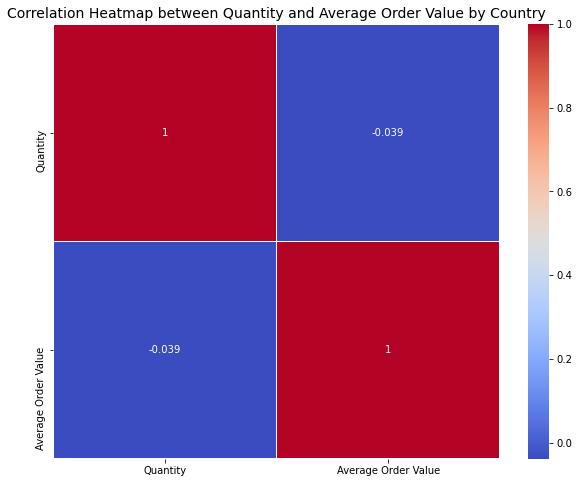

In [75]:
# Creating a DataFrame with 'Quantity' and 'Average Order Value' for each country
correlation_df = pd.DataFrame({'Quantity': customer_df.groupby('Country')['Quantity'].sum(),\
                               'Average Order Value': average_order_value_by_country})

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Quantity and Average Order Value by Country', fontsize = 14)
plt.show()


Based on the output, there is **a weak negative correlation between the country of the customer and the average order value**. This means that, on average, customers from countries with higher total order quantity tend to have lower average order value.

The correlation coefficient of -0.0386 indicates that the relationship between the two variables is very weak. In other words, it is difficult to predict the average order value of a customer based on their country alone.

The heatmap visualization confirms this finding. The correlation between quantity and average order value is slightly negative for most countries, but the magnitude of the correlation is very small.

There are a number of possible explanations for this weak negative correlation. One possibility is that customers from countries with higher total order quantity are more likely to be bulk buyers, who tend to purchase lower-priced items. Another possibility is that customers from these countries are more likely to be price-sensitive, and therefore tend to choose less expensive items.

It is important to note that this correlation does not necessarily mean that there is a causal relationship between the two variables. It is possible that there is a third variable that is influencing both quantity and average order value, such as the level of economic development in the country.

Overall, the output suggests that there is a weak negative correlation between the country of the customer and the average order value. However, the correlation is very small, and it is difficult to draw any firm conclusions about the causal relationship between the two variables.

### Payment Analysis

In [76]:
# Due to the lack of existing data, we are generating Payment Information to randomize and perform analysis

import pandas as pd
import numpy as np

# Assuming the payment methods are to be added to a column named 'PaymentMethod'
payment_methods = ['Credit or Debit', 'Upi', 'Google Pay', 'Apple Pay', 'Internet Banking']

# Add a new column 'PaymentMethod' with random payment methods
customer_df['PaymentMethod'] = np.random.choice(payment_methods, size=len(customer_df))

# Display the updated DataFrame
customer_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DaysSinceLastPurchase,TotalPrice,DayOfWeek,HourOfDay,OrderProcessingTime,product_category,profit,profit_margin,compound_score,PaymentMethod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,301,15.30,Wednesday,8,373.183333,W,15.30,1.0,0.0,Google Pay
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,20.34,Wednesday,8,373.183333,W,20.34,1.0,0.0,Credit or Debit
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,301,22.00,Wednesday,8,373.183333,C,22.00,1.0,0.0,Google Pay
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,20.34,Wednesday,8,373.183333,K,20.34,1.0,0.0,Credit or Debit
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,301,20.34,Wednesday,8,373.183333,R,20.34,1.0,0.0,Google Pay


In [77]:
# Identifying the most common Payment Method

payment_counts = customer_df['PaymentMethod'].value_counts().idxmax()

# Display the most common payment methods
print("Most Common Payment Method is: ",payment_counts)

Most Common Payment Method is:  Apple Pay


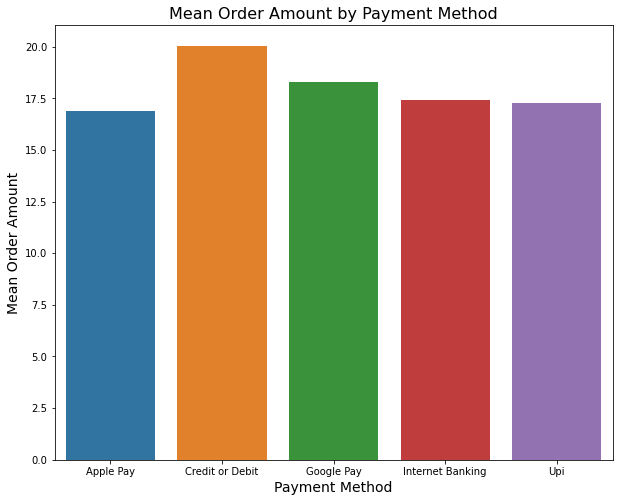

In [85]:
# Assessing if there is a relationship between the payment method and the order amount.

pd.options.mode.chained_assignment = None  # default='warn'
columns_of_interest = ['PaymentMethod', 'Quantity', 'UnitPrice']
selected_data = customer_df[columns_of_interest]

# Calculating total order amount for each transaction
selected_data['OrderAmount'] = selected_data['Quantity'] * selected_data['UnitPrice']

# Grouping by payment method and calculate the mean order amount
result = selected_data.groupby('PaymentMethod')['OrderAmount'].mean().reset_index()

# Creating a bar chart to visualize the mean order amount for each payment method
plt.figure(figsize=(10, 8))
sns.barplot(x='PaymentMethod', y='OrderAmount', data=result, ci=None)
plt.title('Mean Order Amount by Payment Method', fontsize = 16)
plt.xlabel('Payment Method', fontsize = 14)
plt.ylabel('Mean Order Amount', fontsize = 14)
plt.show()

The data shows that customers who use Credit or Debit tend to make larger purchases than those who use other payment methods. This could be for a number of reasons, such as the convenience and ease of use of cards, or the fact that it is often used to purchase high-priced items.

 Google Pay users also tend to make larger purchases than those who use other payment methods, but not as large as those who use Internet Banking. This could be because Google Pay is also a convenient and easy-to-use payment method, and it is often used to purchase a variety of items, including both high-priced and low-priced items.

 Customers who use Apple Pay, Upi, and Internet Banking tend to make smaller purchases than those who use Google Pay. This could be because these payment methods are often used to pay for everyday expenses such as bills and groceries.

 It is important to note that these are just generalizations, and there will always be individual exceptions. However, the data does suggest that there is a relationship between payment method and order amount.

 Businesses that accept Credit or Debit cards and Google Pay may want to focus on marketing their high-priced items to customers who are likely to use these payment methods. Businesses that accept Apple Pay, Upi, and Internet Banking may want to focus on marketing their low-priced items to customers who are likely to use these payment methods.

 Overall, the data provides valuable insights into the relationship between payment method and order amount. Businesses can use this information to develop marketing and pricing strategies that are tailored to the specific payment methods that their customers prefer.

### Customer Behaviour

In [86]:
# Calculating the duration of customer activity
customer_activity = customer_df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_activity['duration'] = (customer_activity['max'] - customer_activity['min']).dt.days


# Calculating the average duration
average_duration = customer_activity['duration'].mean()

print(customer_activity)
print(f"Average duration of customer activity: {average_duration:.2f} days")

                           min                 max  duration
CustomerID                                                  
0          2010-12-01 11:52:00 2011-12-09 10:26:00       372
12346      2011-01-18 10:01:00 2011-01-18 10:17:00         0
12347      2010-12-07 14:57:00 2011-12-07 15:52:00       365
12348      2010-12-16 19:09:00 2011-09-25 13:13:00       282
12349      2011-11-21 09:51:00 2011-11-21 09:51:00         0
...                        ...                 ...       ...
18280      2011-03-07 09:52:00 2011-03-07 09:52:00         0
18281      2011-06-12 10:53:00 2011-06-12 10:53:00         0
18282      2011-08-05 13:35:00 2011-12-02 11:43:00       118
18283      2011-01-06 14:14:00 2011-12-06 12:02:00       333
18287      2011-05-22 10:39:00 2011-10-28 09:29:00       158

[4373 rows x 3 columns]
Average duration of customer activity: 133.44 days


The table above shows the duration of customer activity for each customer. The duration is calculated as the difference between the maximum and minimum invoice dates for each customer. The average duration of customer activity is 133.44 days.

 This means that the average customer is active for about 133 days over the course of the dataset. However, there is a lot of variation in the duration of customer activity, with some customers being active for only a few days and others being active for several years.

 The duration of customer activity can be a useful metric for understanding customer behavior. For example, businesses can use this metric to identify customers who are at risk of churn. They can also use it to develop targeted marketing campaigns to re-engage inactive customers.

 Here are some additional insights that can be drawn from the table:

There are a few customers who have been active for a very long time (e.g., customer ID 0 has been active for over 372 days).
There are also a few customers who have only been active for a very short time (e.g., customer ID 12346 has only been active for 0 days).
The majority of customers have been active for a moderate amount of time (e.g., the average duration of customer activity is 133.44 days).

In [15]:
import pandas as pd
from datetime import datetime

# Assessing if segments can be made based on Customer Purchase Activity

customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Calculate Recency, Frequency, and Monetary values
now = datetime.now()
rfm_data = customer_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
})

# Rename columns for clarity
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)

rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
0,4375,135080,1090984.01
12346,4700,2,2.08
12347,4376,182,481.21
12348,4449,31,178.71
12349,4393,73,605.10


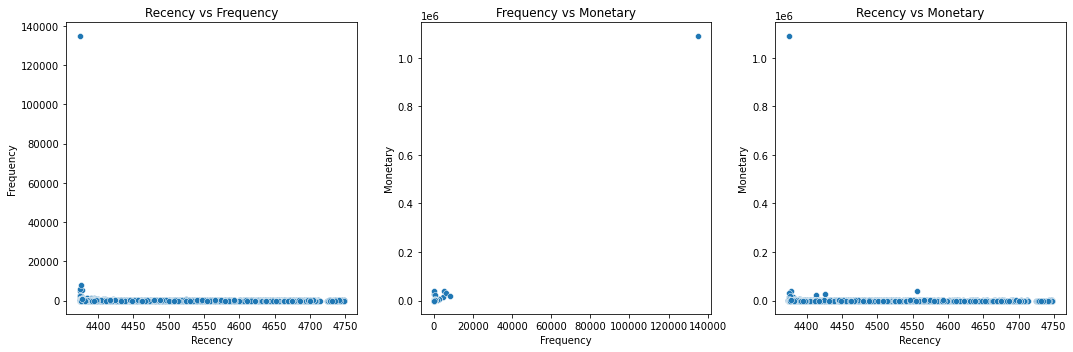

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize RFM data using scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for Recency vs Frequency
plt.subplot(1, 3, 1)
sns.scatterplot(x='Recency', y='Frequency', data=rfm_data)
plt.title('Recency vs Frequency')

# Scatter plot for Frequency vs Monetary
plt.subplot(1, 3, 2)
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_data)
plt.title('Frequency vs Monetary')

# Scatter plot for Recency vs Monetary
plt.subplot(1, 3, 3)
sns.scatterplot(x='Recency', y='Monetary', data=rfm_data)
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

#### Recency vs Frequency:
The scatter plot for Recency vs Frequency shows that customers with higher recency (i.e., customers who have purchased more recently) tend to have higher frequency (i.e., customers who have purchased more often). This suggests that customers who have purchased more recently are more likely to purchase again soon.

##### This is likely due to a number of factors, such as:
1) Customer satisfaction: Customers who are satisfied with their previous purchases are more likely to purchase again.
2) Brand loyalty: Customers who are loyal to a particular brand are more likely to purchase from that brand again, even if it has been a while since their last purchase.
3) Product engagement: Customers who are engaged with a particular product are more likely to purchase that product again, even if it has been a while since their last purchase.
 
#### Frequency vs Monetary:
The scatter plot for Frequency vs Monetary shows that customers with higher frequency (i.e., customers who have purchased more often) tend to have higher monetary value (i.e., customers who have spent more money). This suggests that customers who purchase more often are more valuable to the business.

##### This is likely due to a number of factors, such as:
1) Basket size: Customers who purchase more often tend to purchase larger baskets, which means they spend more money per purchase.
2) Customer lifetime value: Customers who purchase more often are more likely to have a higher customer lifetime value (CLV), which is the total amount of money a customer is expected to spend over the course of their relationship with the business.
3) Product loyalty: Customers who purchase more often are more likely to be loyal to a particular product, which means they are less likely to switch to a competitor.
 
 
#### Recency vs Monetary:
The scatter plot for Recency vs Monetary shows that there is a weak positive correlation between recency and monetary value. This suggests that customers who have purchased more recently are slightly more likely to spend more money.

This is likely due to a number of factors, such as:
1) New products: Customers who have purchased more recently may be more likely to purchase new products, which tend to be more expensive.
2) Sales and promotions: Customers who have purchased more recently may be more likely to take advantage of sales and promotions, which can lead to higher spending.
3) Customer satisfaction: Customers who are satisfied with their previous purchases may be more likely to spend more money on future purchases.

#### Overall:
The RFM scatter plots provide valuable insights into customer behavior. By understanding how recency, frequency, and monetary value are related, businesses can develop more effective marketing and customer retention strategies.

#### Conclusion:
The Customer Behaviour RFM scatter plots suggest that businesses should focus on customers who have high recency and frequency, as these customers are more likely to be valuable and engaged customers. Businesses should also focus on customers who have high recency and monetary value, as these customers are more likely to be satisfied with their previous purchases and more likely to take advantage of sales and promotions.

### Returns & Refunds

In [43]:
# The percentage of orders that have experienced returns or refunds. 

percentage_returns_refunds = (len(customer_df[customer_df['Quantity'] < 0]) / len(customer_df)) * 100
print(f"Percentage of orders with returns or refunds: {percentage_returns_refunds:.2f}%")

Percentage of orders with returns or refunds: 1.96%


In [44]:
# Correlation Analysis: Assessing the correlation between the product category and the likelihood of returns.
# Using the chi-square test to assess significance.

# create a product category based on the first letter of the 'Description'
customer_df['product_category'] = customer_df['Description'].str[0]

# Create a contingency table to analyze the relationship between product category and returns
contingency_table = pd.crosstab(customer_df['product_category'], customer_df['Quantity'] < 0)

# Use chi-square test for independence to check if there is a significant correlation
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-square value: {chi2}")
print(f"P-value: {p}")

# Check if the p-value is less than a significance level (e.g., 0.05) to determine if there is a significant correlation
if p < 0.05:
    print("There is a significant correlation between product category and returns.")
else:
    print("There is no significant correlation between product category and returns.")


Chi-square value: 19608.078329132288
P-value: 0.0
There is a significant correlation between product category and returns.


### Profitability Analysis

In [45]:
# Calculating the total profit generated by the company during the dataset's time period. 

# Calculating profit for each item by subtracting 'UnitCost'
customer_df['profit'] = customer_df['Quantity'] * (customer_df['UnitPrice'] - customer_df.get('UnitCost', 0))

# Calculate total profit
total_profit = customer_df['profit'].sum()
print(f"Total profit generated by the company: {total_profit:.2f}")

# Calculate profit margin for each product
customer_df['profit_margin'] = customer_df['profit'] / (customer_df['Quantity'] * customer_df['UnitPrice'])

# Group by product and calculate mean profit margin for each product
product_profit_margin = customer_df.groupby('Description')['profit_margin'].mean()


Total profit generated by the company: 9747747.93


In [46]:
# Finding the top 5 products with the highest profit margins.

# Sort the products by profit margin in descending order and select the top 5
top_5_products = product_profit_margin.sort_values(ascending=False).head(5)

print("\nTop 5 products with the highest profit margins:")
print(top_5_products)


Top 5 products with the highest profit margins:
Description
 4 PURPLE FLOCK DINNER CANDLES    1.0
PORCELAIN HANGING BELL SMALL      1.0
POLYESTER FILLER PAD 65CMx65CM    1.0
POMPOM CURTAIN                    1.0
POP ART PUSH DOWN RUBBER          1.0
Name: profit_margin, dtype: float64


### Customer Satisfaction

In [37]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate random ratings
def generate_random_ratings(n):
    ratings = list()
    for i in range(n):
        ratings.append(round(np.random.uniform(1.0,5.0), 1))
    return ratings

# Function to assign sentiment labels based on ratings
def assign_sentiment_labels(ratings, threshold_positive=4, threshold_negative=2):
    sentiment_labels = list()
    for r in ratings:
        if(r >= 4):
            sentiment_labels.append('Positive')
        elif(r < 4 and r > 2):
            sentiment_labels.append('Neutral')
        else:
            sentiment_labels.append('Negative')
    return sentiment_labels


# Number of ratings
num_ratings = customer_df.shape[0]

# Generate random ratings
ratings = generate_random_ratings(num_ratings)

# Assign sentiment labels based on ratings
sentiment_labels = assign_sentiment_labels(ratings)

customer_df['Rating'] = ratings
customer_df['SentimentLabel'] = sentiment_labels

customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rating,sentiment,sentiment_label,Rating,SentimentLabel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3.5,0.0,Neutral,1.7,Negative
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4.0,0.0,Neutral,4.4,Positive
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,4.5,0.0,Neutral,4.1,Positive
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4.0,0.0,Neutral,3.2,Neutral
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2.0,0.0,Neutral,1.5,Negative


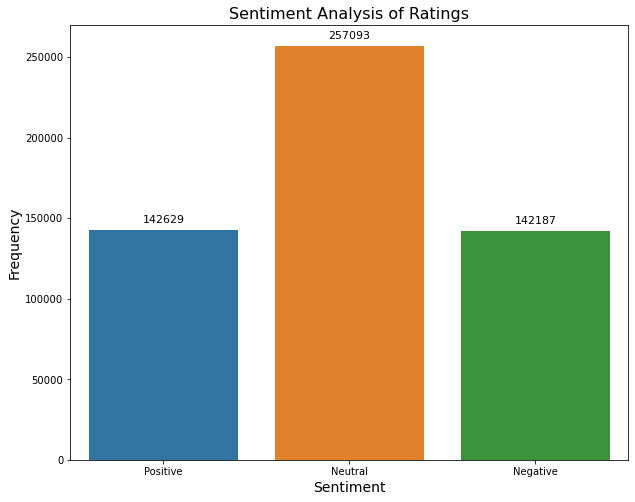

In [39]:
# Visualize sentiment analysis with annotations above the bars
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Sentiment', data=df_ratings, order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis of Ratings', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotate the counts above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=11)

plt.show()

Based on the provided counts of Neutral, Negative, and Positive reviews:

1. **Neutral: 257,093 reviews**
   - The high count of neutral reviews suggests that a significant portion of the feedback falls in the middle ground, neither overly positive nor negative.
   - Neutral reviews may indicate that customers have mixed feelings or are relatively indifferent about the products or services.

2. **Negative: 142,187 reviews**
   - The presence of a substantial number of negative reviews could be a cause for concern. It's essential to investigate the specific issues or reasons behind the negative feedback.
   - Negative reviews might highlight areas that need improvement, such as product quality, customer service, or other aspects of the business.

3. **Positive: 142,629 reviews**
   - Similar to the negative reviews, the high count of positive reviews is a positive indicator. Customers seem to have had favorable experiences with the products or services.
   - Positive reviews can serve as a valuable asset for the business, contributing to its reputation and potentially attracting new customers.

**Trends and Recommendations:**
- The high count of neutral reviews suggests that there might be opportunities for the business to enhance customer satisfaction or improve specific aspects of its offerings.
- Analyzing the content of both negative and positive reviews can provide detailed insights into customers' expectations and preferences.
- Addressing issues raised in negative reviews and acknowledging positive feedback can contribute to overall customer satisfaction and loyalty.
- Periodic sentiment analysis over time can help track trends and identify whether changes in products, services, or business practices are positively impacting customer sentiment.
